In [7]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image

In [8]:

def plot_NQueens(solution, fig = None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    # im = im.resize((int(100 / n), int(100 / n)))
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    # NQueensCSP gives a solution as a dictionary
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    # NQueensProblem gives a solution as a list
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()
    # return fig
    

C:\Users\mahma\AppData\Local\Temp\ipykernel_13524\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


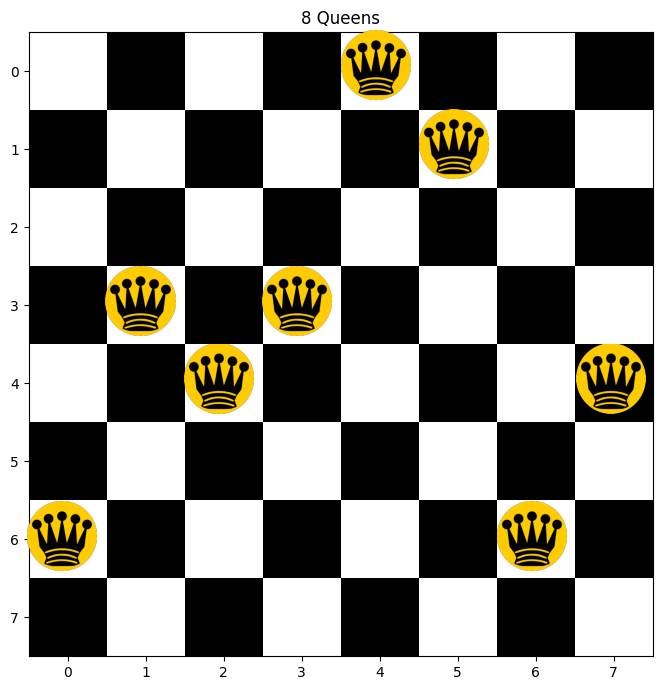

TypeError: plot_NQueens() got an unexpected keyword argument 'algorithm'

In [9]:
def count_attacking_queens(state):
    n = len(state)
    attacks = 0
    for i in range(n):
        for j in range(i + 1, n):
            # Check if queens share the same row or diagonal
            if state[i] == state[j] or abs(i - j) == abs(state[i] - state[j]):
                attacks += 1
    return attacks

def move_queen(current_state, queen_index, new_position):
    new_state = list(current_state)
    new_state[queen_index] = new_position
    return new_state

def successor(current_state):
    n = len(current_state)
   
    queen_index = random.randint(0, n - 1)
    
    new_position = random.randint(0, n - 1)
    while new_position == current_state[queen_index]:  
        new_position = random.randint(0, n - 1)
    
    new_state = list(current_state)
    new_state[queen_index] = new_position
    return new_state
"""
def hill_climbing(n, max_iter=1000):
    random.seed(32)  
    current_state = [random.randint(0, n-1) for _ in range(n)]  
    for _ in range(max_iter):
        attacks = count_attacking_queens(current_state)
        if attacks == 0:  
            return current_state
       
        neighbors = [successor(current_state) for _ in range(n)]
        
        best_neighbor = min(neighbors, key=count_attacking_queens)
        if count_attacking_queens(best_neighbor) >= attacks:
            return current_state  
        current_state = best_neighbor
    return current_state

def stochastic_hill_climbing(n, max_iter=1000):
    random.seed(32)  
    current_state = [random.randint(0, n-1) for _ in range(n)]  
    for _ in range(max_iter):
        attacks = count_attacking_queens(current_state)
        if attacks == 0:  
            return current_state
        
        neighbor = successor(current_state)
        if count_attacking_queens(neighbor) < attacks:
            current_state = neighbor
    return current_state
"""
def simulated_annealing(n, max_iter=1000, initial_temperature=1000, cooling_rate=0.95):
    random.seed(32)  
    current_state = [random.randint(0, n-1) for _ in range(n)]  
    current_energy = count_attacking_queens(current_state)
    temperature = initial_temperature
    for _ in range(max_iter):
        if current_energy == 0:  
            return current_state
       
        neighbor = successor(current_state)
        neighbor_energy = count_attacking_queens(neighbor)
      
        delta_energy = neighbor_energy - current_energy
        if delta_energy < 0 or random.random() < np.exp(-delta_energy / temperature):
            current_state = neighbor
            current_energy = neighbor_energy
        temperature *= cooling_rate  
    return current_state

def manual_8_queens():
    current_state = [random.randint(0, 7) for _ in range(8)]
    plot_NQueens(current_state)

    while True:
        queen_index_input = input("Enter the queen index FROM 0 to 7 to move or -1 to quit:")
        if queen_index_input == "-1":
            break
        try:
            queen_index = int(queen_index_input)
            if queen_index < 0 or queen_index > 7:
                print("Invalid queen index. Please enter a number between 0 and 7.")
                continue
        except ValueError:
            print("Invalid input. Please enter a valid integer.")
            continue

        new_position_input = input("Enter the new position from 0 to 7 for the queen:")
        try:
            new_position = int(new_position_input)
            if new_position < 0 or new_position > 7:
                print("Invalid position. Please enter a number between 0 and 7.")
                continue
        except ValueError:
            print("Invalid input. Please enter a valid integer.")
            continue

        current_state = move_queen(current_state, queen_index, new_position)
        plot_NQueens(current_state, algorithm="Manual Move")
        #current_state = hill_climbing(8)
        plot_NQueens(current_state, algorithm="Hill Climbing")
        #current_state = stochastic_hill_climbing(8)
        plot_NQueens(current_state, algorithm="Stochastic HillClimbing")
        current_state = simulated_annealing(8)
        plot_NQueens(current_state, algorithm="Simulated Annealing")

manual_8_queens()
